In [ ]:
我想了解各個縣市的人口數與犯罪數之間的關聯
Q1.各個縣市在107年時的犯罪率
Q2.在107年犯罪率最高及最低的縣市，107年至111年的犯罪率趨勢
Q3.犯罪數與人口數之間的相關性高低

In [ ]:
# 引入套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# 設定 CSV 檔案(stock_index)的路徑
population_data= 'coupon in currency, population.csv'

# 使用 pandas 的 read_csv 函式讀取 CSV 檔案並將其轉換為 DataFrame 並使用 utf-8 的編碼方式來處理這個檔案
df= pd.read_csv('population.csv', encoding='utf-8')
df

,Year,New Taipei City,Taipei City,Taoyuan City,Taichung City,Tainan City,Kaohsiung City,Yilan County,Hsinchu County,Miaoli County,...,Chiayi County,Pingtung County,Taitung County,Hualien County,Penghu County,Keelung City,Hsinchu City,Chiayi City,Kinmen County,Lienchiang County
0,107,3995717,2668572,2220872,2803894,1883831,2773533,455221,557010,548863,...,507068,825406,218919,327968,104440,370155,445635,268622,139273,13056
1,108,4018696,2645041,2249037,2815261,1880906,2773198,454178,563933,545459,...,503113,819184,216781,1816247,105207,368893,448803,267690,140185,13089
2,109,4030954,2602418,2268807,2820787,1874917,2765932,453087,570775,542590,...,499481,812658,215261,324372,105952,367577,451412,266005,140597,13279
3,110,4008113,2524393,2272391,2813490,1862059,2744691,450692,575580,538178,...,493316,804440,213386,321358,106340,363977,452640,264727,141539,13645
4,111,3995551,2480681,2281464,2814459,1852997,2728137,449062,580503,535132,...,488158,798703,212551,318892,107223,361526,452473,262924,141295,13983


In [88]:
# 設定 CSV 檔案(stock_index)的路徑
crimenumber_data= 'coupon in currency, crimenumber.csv'

# 使用 pandas 的 read_csv 函式讀取 CSV 檔案並將其轉換為 DataFrame 並使用 utf-8 的編碼方式來處理這個檔案
df= pd.read_csv('crimenumber.csv', encoding='utf-8')
df

,Year,New Taipei City,Taipei City,Taoyuan City,Taichung City,Tainan City,Kaohsiung City,Yilan County,Hsinchu County,Miaoli County,...,Chiayi County,Pingtung County,Taitung County,Hualien County,Penghu County,Keelung City,Hsinchu City,Chiayi City,Kinmen County,Lienchiang County
0,107,43558,42306,20854,25496,25923,28316,7278,6899,5793,...,6537,10825,3129,6210,972,6303,4413,3555,1086,97
1,108,39649,40098,19757,24670,24450,27596,6821,6695,5124,...,6086,9814,3049,6080,1060,5300,4373,3344,950,88
2,109,34886,38746,19663,24025,24558,26165,7644,7032,5001,...,6250,9006,2714,4653,1184,4944,4105,3280,1139,131
3,110,31874,34480,18858,22963,24202,24580,7139,6129,4860,...,5984,8469,2297,3889,1282,4840,4081,3385,1023,145
4,111,35311,36210,23425,22293,25683,23435,6925,8162,7206,...,5867,9605,3107,4826,1288,5656,4168,3552,1097,134


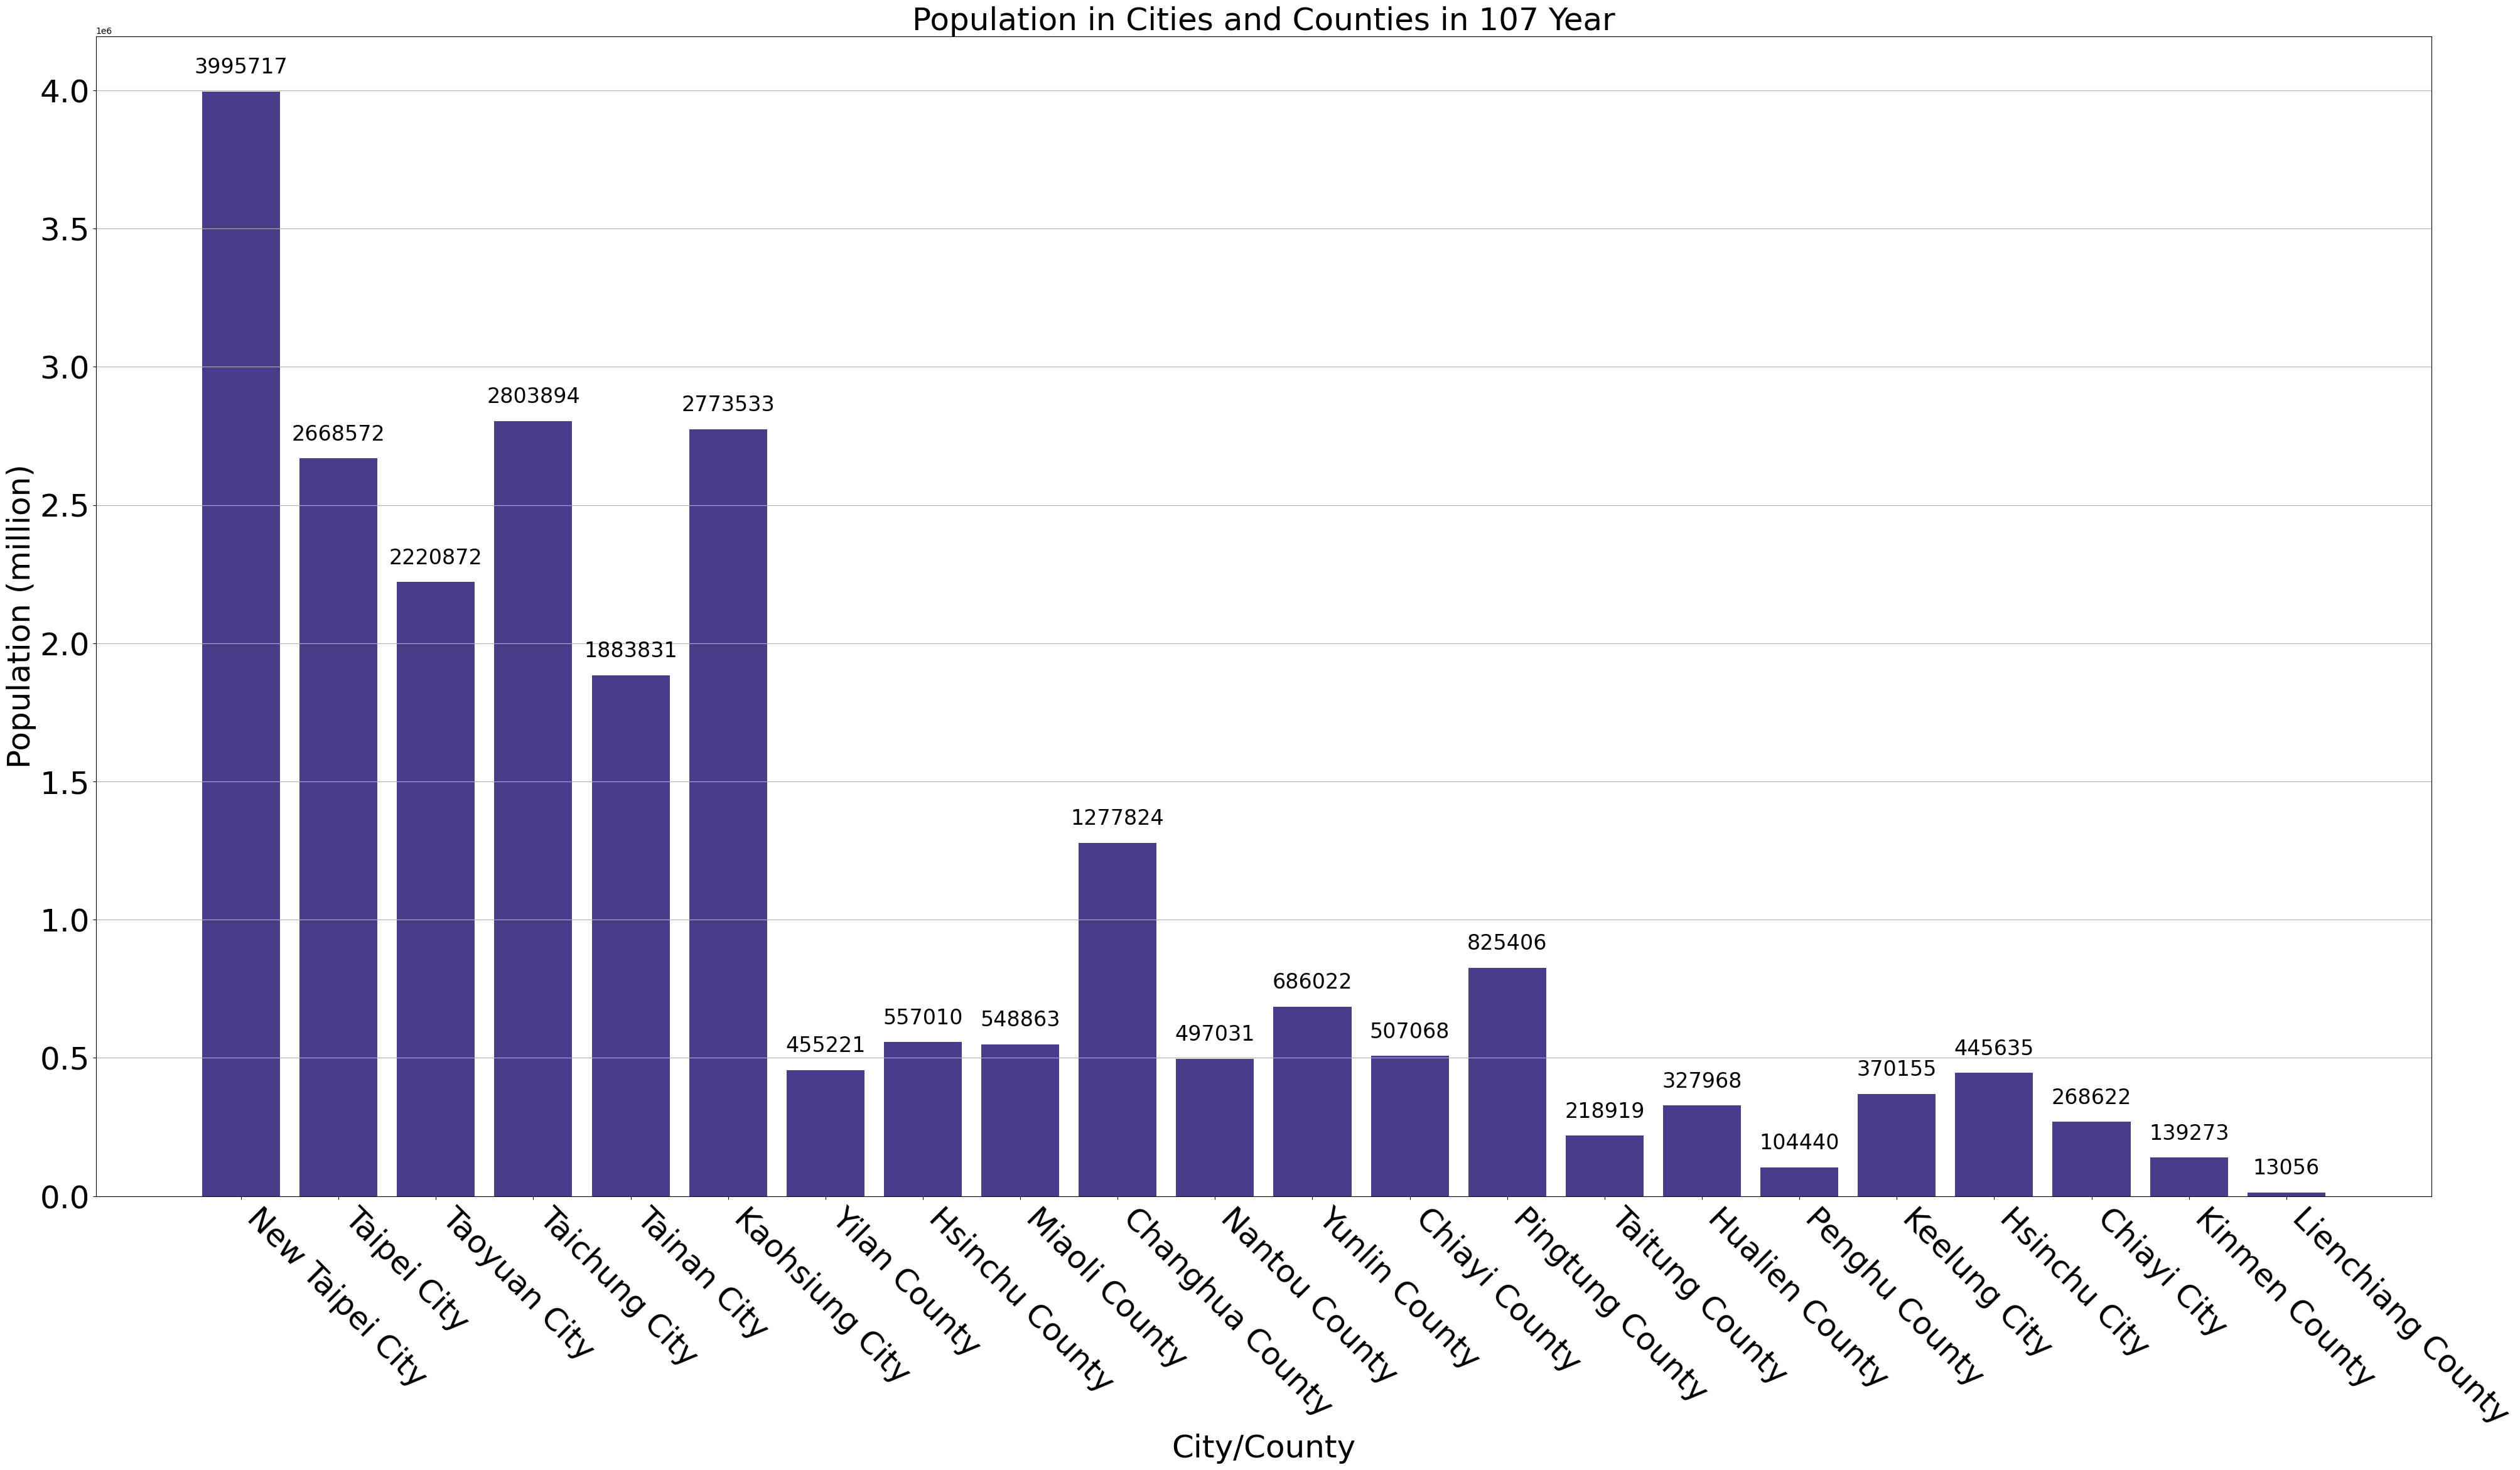

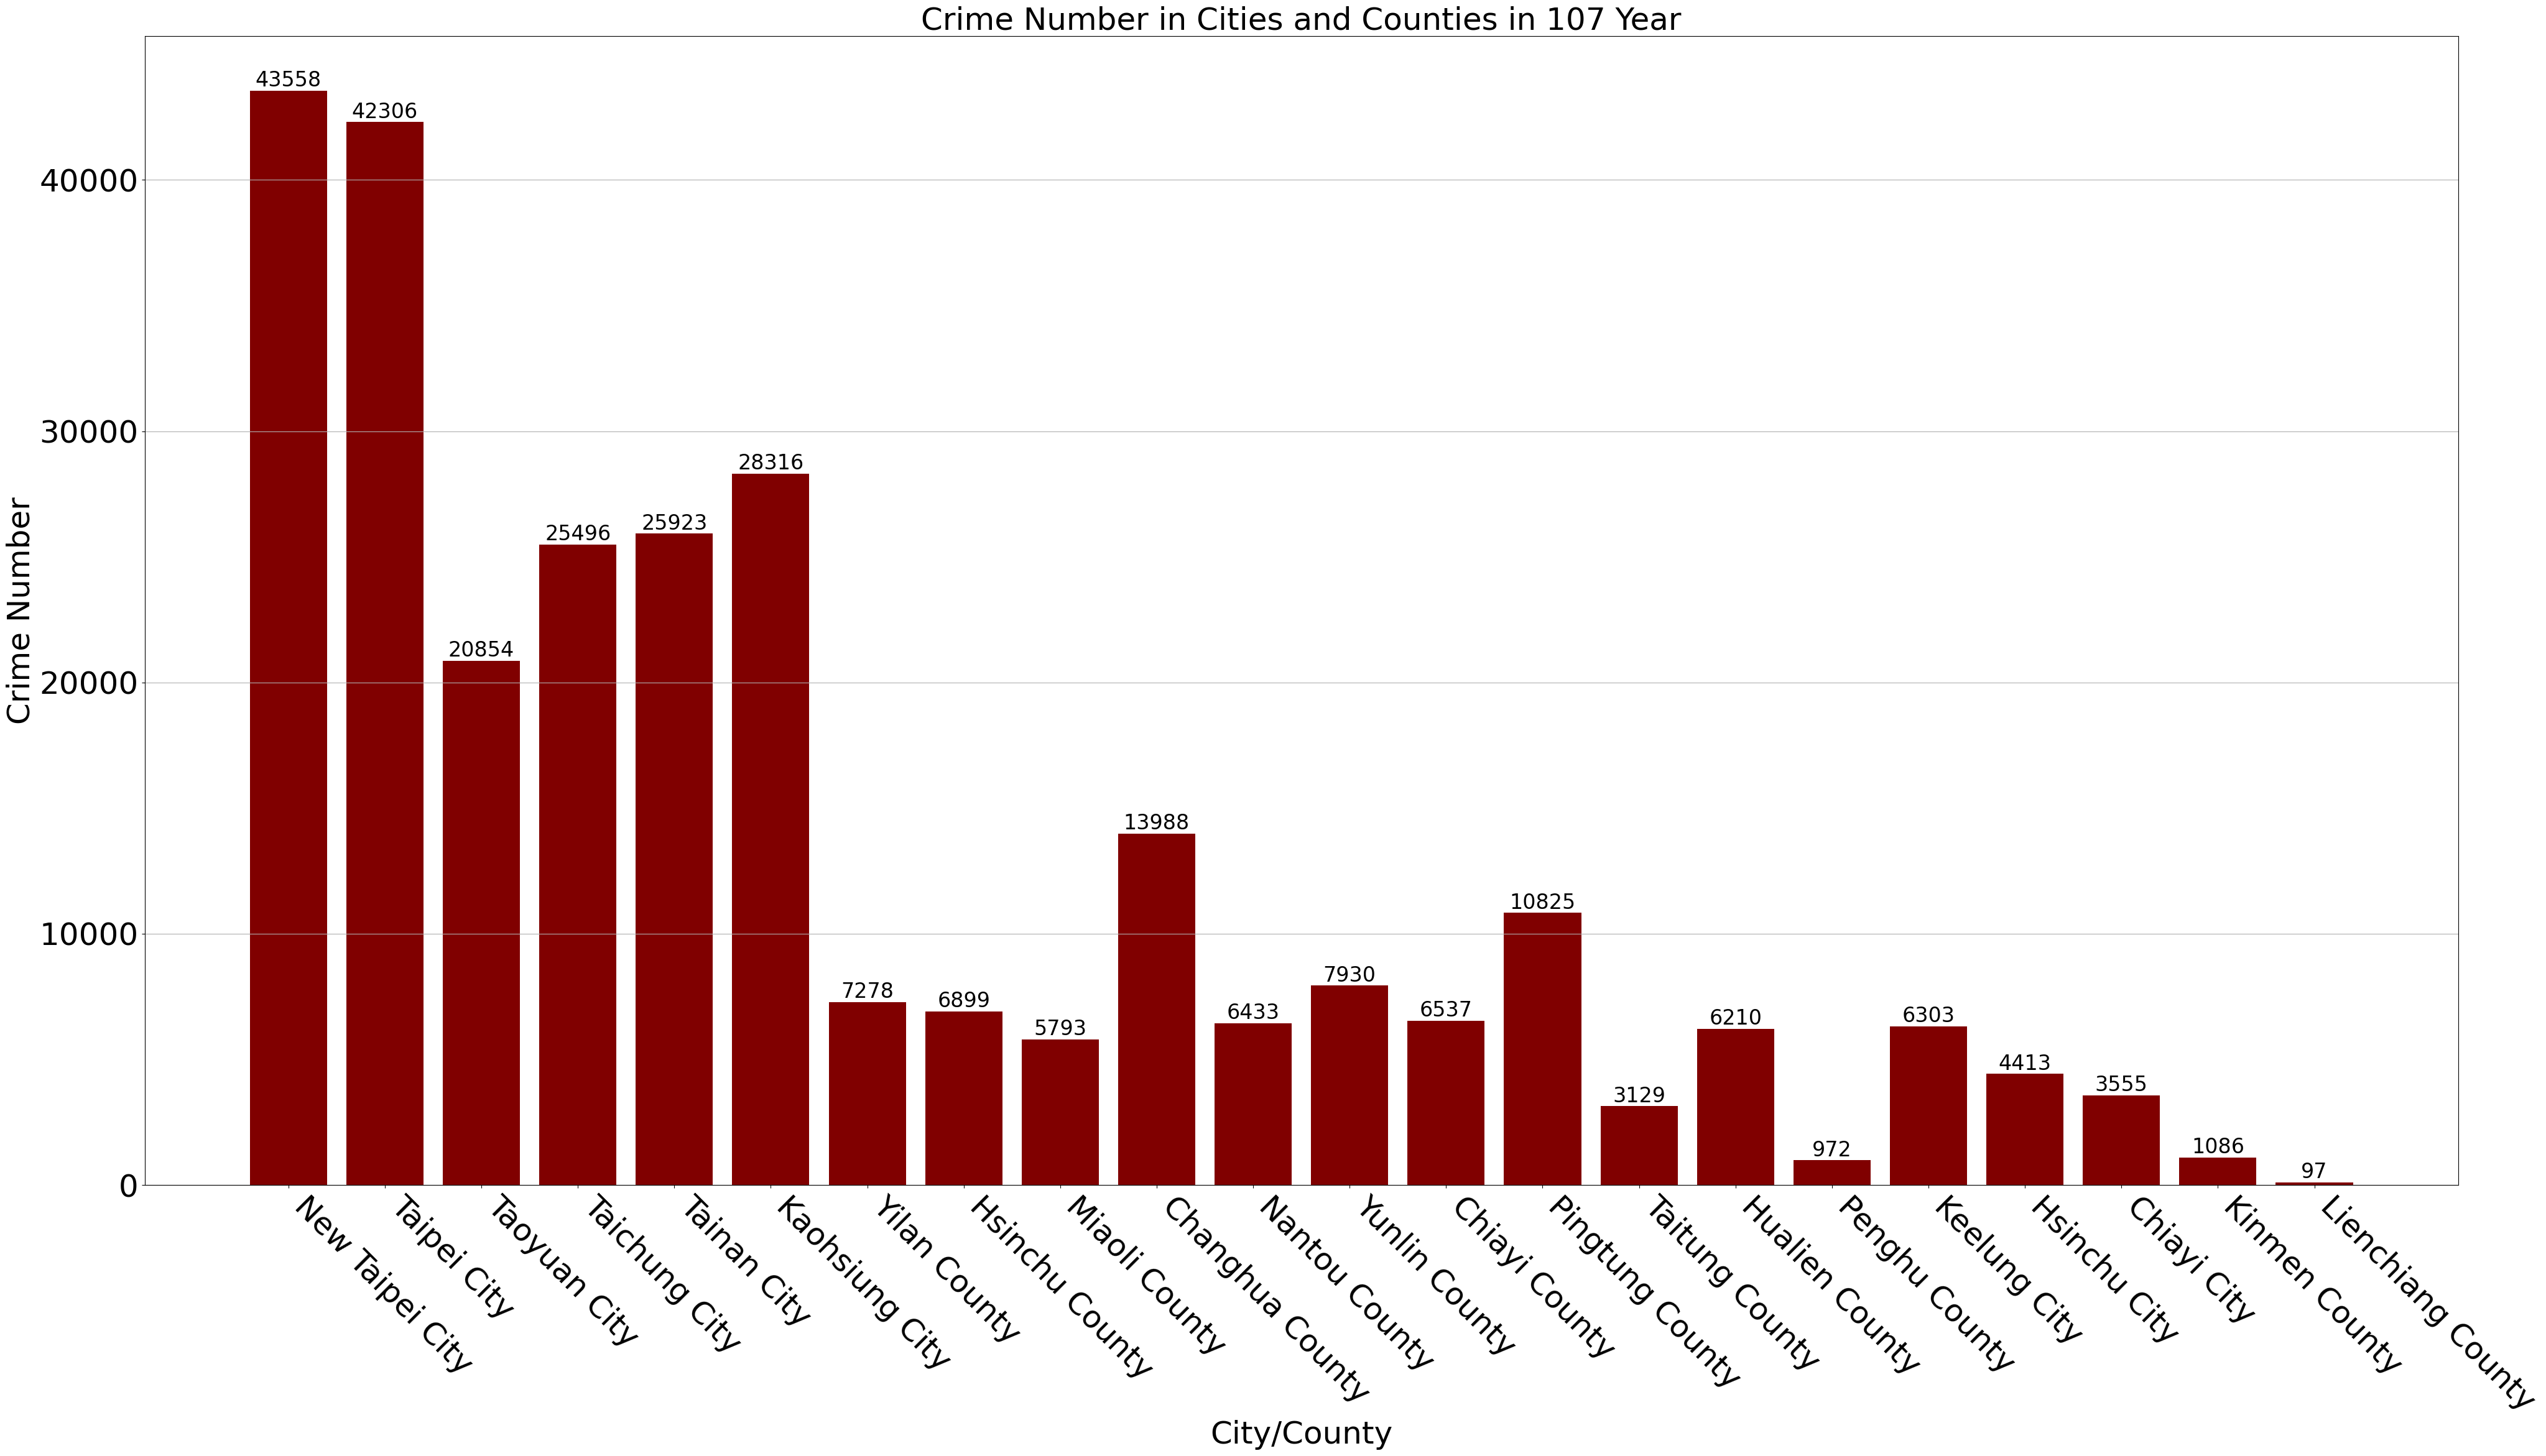

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

#107年各縣市人口數
# 讀取CSV檔案
df = pd.read_csv('population.csv')

# 選擇107年的資料
year_107_data = df[df['Year'] == 107]

# 取得縣市名稱和人口數資料
cities = year_107_data.columns[1:]  # 以第二欄之後的欄位名稱為城市名稱
population = year_107_data.iloc[0, 1:]  # 以第二列之後的資料為人口數

# 繪製長條圖
fig, ax = plt.subplots(figsize=(48, 24))
ax.bar(cities, population, color='darkslateblue')

# 設定圖表標題和軸標籤
ax.set_title('Population in Cities and Counties in 107 Year', fontsize=36)
ax.set_xlabel('City/County', fontsize=36)
ax.set_ylabel('Population (million)', fontsize=36)


# 顯示數值標籤
for i, v in enumerate(population):
    ax.text(i, v + 50000, str(v), ha='center', va='bottom', fontsize=24)  # 設定數值標籤字體大小

# 設定X軸標籤字體大小並斜斜的顯示
plt.xticks(rotation=-45, ha='left', fontsize=36)

# 設定Y軸標籤字體大小
ax.tick_params(axis='y', labelsize=36)

# 顯示圖表
plt.grid(axis='y')
plt.show()


#107年各縣市犯罪數
# 讀取CSV檔案
df = pd.read_csv('crimenumber.csv')

# 選擇107年的資料
year_107_data = df[df['Year'] == 107]

# 取得縣市名稱和犯罪率資料
cities = year_107_data.columns[1:]  # 以第二欄之後的欄位名稱為城市名稱
crimenumber = year_107_data.iloc[0, 1:]  # 以第二列之後的資料為犯罪率

# 繪製長條圖
fig, ax = plt.subplots(figsize=(48, 24))
ax.bar(cities, crimenumber, color='maroon')

# 設定圖表標題和軸標籤
ax.set_title('Crime Number in Cities and Counties in 107 Year', fontsize=36)
ax.set_xlabel('City/County', fontsize=36)
ax.set_ylabel('Crime Number', fontsize=36)

# 顯示數值標籤
for i, v in enumerate(crimenumber):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=24)  # 設定數值標籤字體大小

# 設定X軸標籤字體大小並斜斜的顯示
plt.xticks(rotation=-45, ha='left', fontsize=36)

# 設定Y軸標籤字體大小
ax.tick_params(axis='y', labelsize=36)

# 顯示圖表
plt.grid(axis='y')
plt.show()


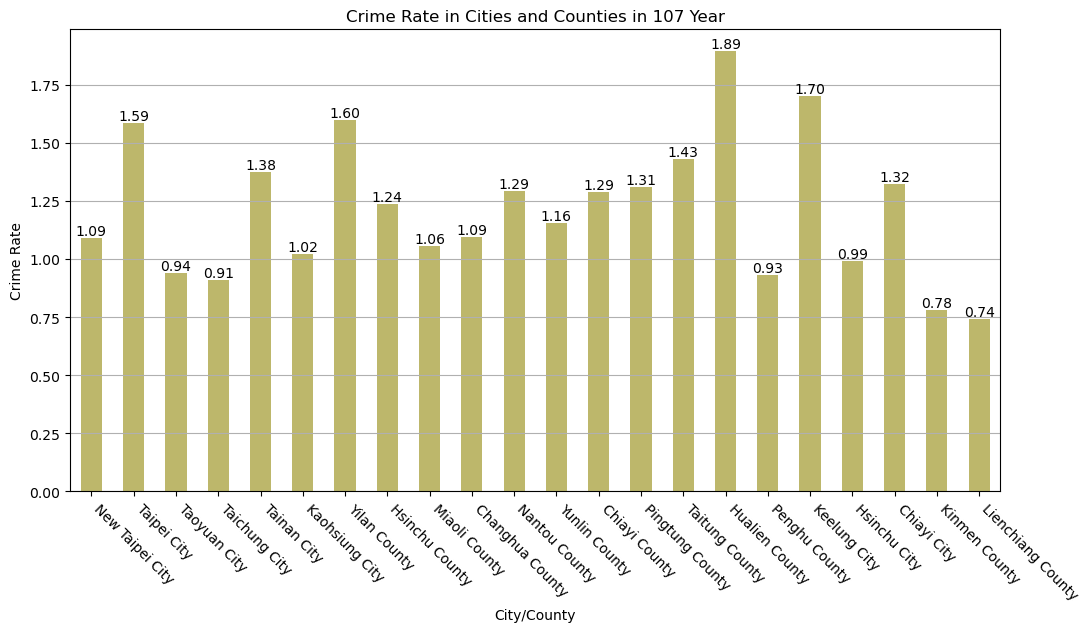

In [55]:
import pandas as pd
import matplotlib.pyplot as plt


# 讀取人口數據
population = pd.read_csv('population.csv')

# 讀取犯罪數據
crimenumber = pd.read_csv('crimenumber.csv')

# 選擇107年的資料
year_107_population = population[population['Year'] == 107].iloc[:, 1:]
year_107_crimenumber = crimenumber[crimenumber['Year'] == 107].iloc[:, 1:]

# 計算犯罪率（犯罪數 / 人口數 * 100）
crime_rate = (year_107_crimenumber / year_107_population) * 100

# 繪製長條圖
fig, ax = plt.subplots(figsize=(12, 6))

# 繪製犯罪率長條
bars_crime_rate = crime_rate.iloc[0].plot(kind='bar', color='darkkhaki')

# 設定圖表標題和軸標籤
ax.set_title('Crime Rate in Cities and Counties in 107 Year')
ax.set_xlabel('City/County')
ax.set_ylabel('Crime Rate')

# 顯示數值標籤
for i, v in enumerate(crime_rate.iloc[0]):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# 調整X軸標籤角度
plt.xticks(rotation=-45, ha='left')

# 顯示圖表
plt.grid(axis='y')
plt.show()


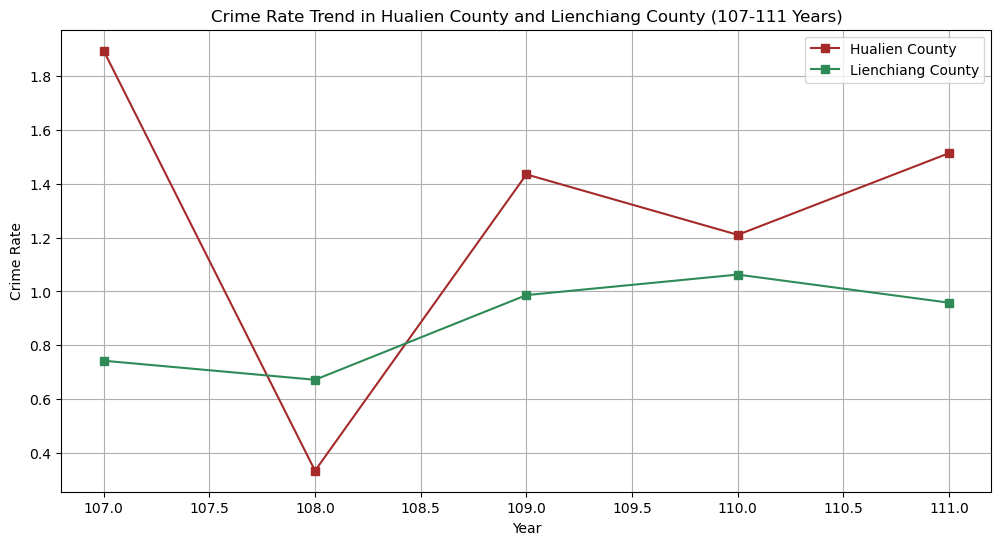

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取人口數據
population_data = pd.read_csv('population.csv')

# 讀取犯罪數據
crime_data = pd.read_csv('crimenumber.csv')

# 提取 Hualien County 和 Lienchiang County 的資料
hualien_population = population_data['Hualien County']
lienchiang_population = population_data['Lienchiang County']

hualien_crime = crime_data['Hualien County']
lienchiang_crime = crime_data['Lienchiang County']

# 計算犯罪率（犯罪數 / 人口數 * 100）
hualien_crime_rate = (hualien_crime / hualien_population) * 100
lienchiang_crime_rate = (lienchiang_crime / lienchiang_population) * 100

# 繪製折線圖
fig, ax = plt.subplots(figsize=(12, 6))

# 繪製 Hualien County 的折線
ax.plot(population_data['Year'], hualien_crime_rate, label='Hualien County', marker='s', color='brown')

# 繪製 Lienchiang County 的折線
ax.plot(population_data['Year'], lienchiang_crime_rate, label='Lienchiang County', marker='s', color='seagreen')

# 設定圖表標題和軸標籤
ax.set_title('Crime Rate Trend in Hualien County and Lienchiang County (107-111 Years)')
ax.set_xlabel('Year')
ax.set_ylabel('Crime Rate')
ax.legend()

# 顯示圖表
plt.grid(True)
plt.show()


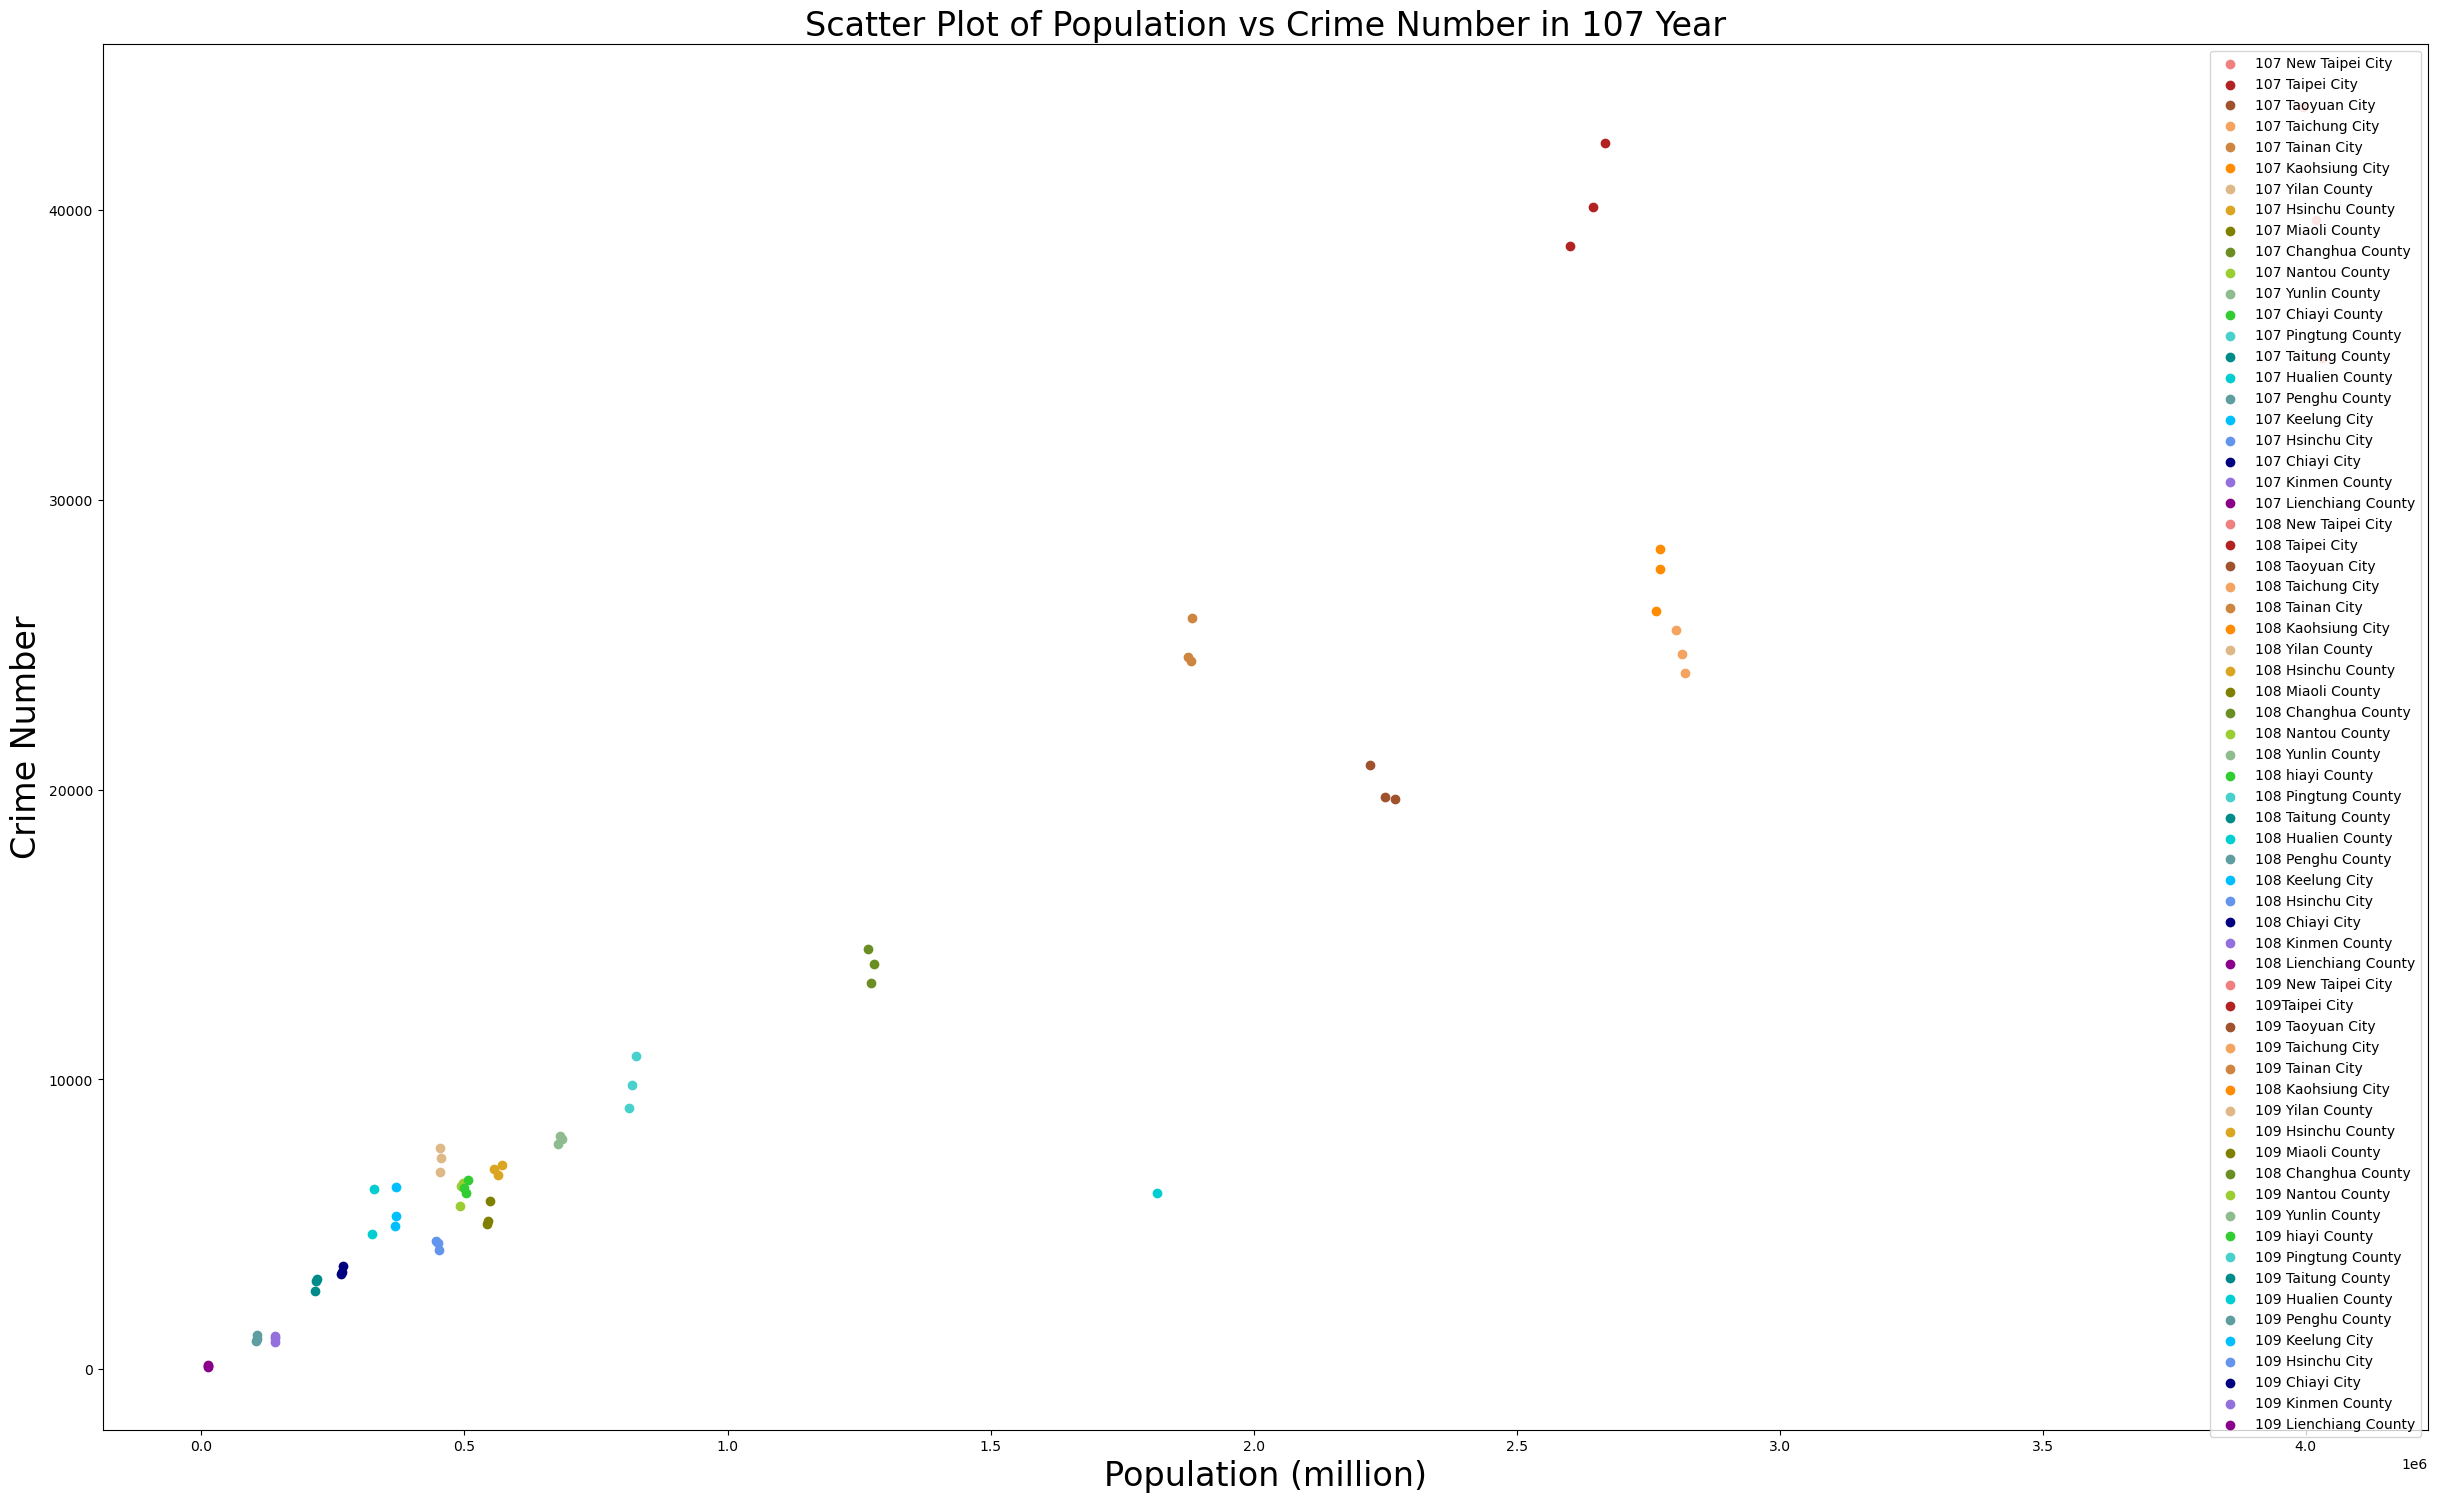

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取人口數據
population_data = pd.read_csv('population.csv')

# 讀取犯罪數據
crime_data = pd.read_csv('crimenumber.csv')

# 合併兩個 DataFrame
merged_data = pd.merge(population_data, crime_data, on='Year', suffixes=('_pop', '_crime'))

# 選擇107-109的資料（五年全選資料有點太多）
year_107_data = merged_data[merged_data['Year'] == 107]
year_108_data = merged_data[merged_data['Year'] == 108]
year_109_data = merged_data[merged_data['Year'] == 109]

# 製作散點圖
plt.figure(figsize=(30, 18))
plt.scatter(year_107_data['New Taipei City_pop'], year_107_data['New Taipei City_crime'], label='107 New Taipei City', color='lightcoral')
plt.scatter(year_107_data['Taipei City_pop'], year_107_data['Taipei City_crime'], label='107 Taipei City', color='firebrick')
plt.scatter(year_107_data['Taoyuan City_pop'], year_107_data['Taoyuan City_crime'], label='107 Taoyuan City', color='sienna')
plt.scatter(year_107_data['Taichung City_pop'], year_107_data['Taichung City_crime'], label='107 Taichung City', color='sandybrown')
plt.scatter(year_107_data['Tainan City_pop'], year_107_data['Tainan City_crime'], label='107 Tainan City', color='peru')
plt.scatter(year_107_data['Kaohsiung City_pop'], year_107_data['Kaohsiung City_crime'], label='107 Kaohsiung City', color='darkorange')
plt.scatter(year_107_data['Yilan County_pop'], year_107_data['Yilan County_crime'], label='107 Yilan County', color='burlywood')
plt.scatter(year_107_data['Hsinchu County_pop'], year_107_data['Hsinchu County_crime'], label='107 Hsinchu County', color='goldenrod')
plt.scatter(year_107_data['Miaoli County_pop'], year_107_data['Miaoli County_crime'], label='107 Miaoli County', color='olive')
plt.scatter(year_107_data['Changhua County_pop'], year_107_data['Changhua County_crime'], label='107 Changhua County', color='olivedrab')
plt.scatter(year_107_data['Nantou County_pop'], year_107_data['Nantou County_crime'], label='107 Nantou County', color='yellowgreen')
plt.scatter(year_107_data['Yunlin County_pop'], year_107_data['Yunlin County_crime'], label='107 Yunlin County', color='darkseagreen')
plt.scatter(year_107_data['Chiayi County_pop'], year_107_data['Chiayi County_crime'], label='107 Chiayi County', color='limegreen')
plt.scatter(year_107_data['Pingtung County_pop'], year_107_data['Pingtung County_crime'], label='107 Pingtung County', color='mediumturquoise')
plt.scatter(year_107_data['Taitung County_pop'], year_107_data['Taitung County_crime'], label='107 Taitung County', color='darkcyan')
plt.scatter(year_107_data['Hualien County_pop'], year_107_data['Hualien County_crime'], label='107 Hualien County', color='darkturquoise')
plt.scatter(year_107_data['Penghu County_pop'], year_107_data['Penghu County_crime'], label='107 Penghu County', color='cadetblue')
plt.scatter(year_107_data['Keelung City_pop'], year_107_data['Keelung City_crime'], label='107 Keelung City', color='deepskyblue')
plt.scatter(year_107_data['Hsinchu City_pop'], year_107_data['Hsinchu City_crime'], label='107 Hsinchu City', color='cornflowerblue')
plt.scatter(year_107_data['Chiayi City_pop'], year_107_data['Chiayi City_crime'], label='107 Chiayi City', color='navy')
plt.scatter(year_107_data['Kinmen County_pop'], year_107_data['Kinmen County_crime'], label='107 Kinmen County', color='mediumpurple')
plt.scatter(year_107_data['Lienchiang County_pop'], year_107_data['Lienchiang County_crime'], label='107 Lienchiang County', color='darkmagenta')

plt.scatter(year_108_data['New Taipei City_pop'], year_108_data['New Taipei City_crime'], label='108 New Taipei City', color='lightcoral')
plt.scatter(year_108_data['Taipei City_pop'], year_108_data['Taipei City_crime'], label='108 Taipei City', color='firebrick')
plt.scatter(year_108_data['Taoyuan City_pop'], year_108_data['Taoyuan City_crime'], label='108 Taoyuan City', color='sienna')
plt.scatter(year_108_data['Taichung City_pop'], year_108_data['Taichung City_crime'], label='108 Taichung City', color='sandybrown')
plt.scatter(year_108_data['Tainan City_pop'], year_108_data['Tainan City_crime'], label='108 Tainan City', color='peru')
plt.scatter(year_108_data['Kaohsiung City_pop'], year_108_data['Kaohsiung City_crime'], label='108 Kaohsiung City', color='darkorange')
plt.scatter(year_108_data['Yilan County_pop'], year_108_data['Yilan County_crime'], label='108 Yilan County', color='burlywood')
plt.scatter(year_108_data['Hsinchu County_pop'], year_108_data['Hsinchu County_crime'], label='108 Hsinchu County', color='goldenrod')
plt.scatter(year_108_data['Miaoli County_pop'], year_108_data['Miaoli County_crime'], label='108 Miaoli County', color='olive')
plt.scatter(year_108_data['Changhua County_pop'], year_108_data['Changhua County_crime'], label='108 Changhua County', color='olivedrab')
plt.scatter(year_108_data['Nantou County_pop'], year_108_data['Nantou County_crime'], label='108 Nantou County', color='yellowgreen')
plt.scatter(year_108_data['Yunlin County_pop'], year_108_data['Yunlin County_crime'], label='108 Yunlin County', color='darkseagreen')
plt.scatter(year_108_data['Chiayi County_pop'], year_108_data['Chiayi County_crime'], label='108 hiayi County', color='limegreen')
plt.scatter(year_108_data['Pingtung County_pop'], year_108_data['Pingtung County_crime'], label='108 Pingtung County', color='mediumturquoise')
plt.scatter(year_108_data['Taitung County_pop'], year_108_data['Taitung County_crime'], label='108 Taitung County', color='darkcyan')
plt.scatter(year_108_data['Hualien County_pop'], year_108_data['Hualien County_crime'], label='108 Hualien County', color='darkturquoise')
plt.scatter(year_108_data['Penghu County_pop'], year_108_data['Penghu County_crime'], label='108 Penghu County', color='cadetblue')
plt.scatter(year_108_data['Keelung City_pop'], year_108_data['Keelung City_crime'], label='108 Keelung City', color='deepskyblue')
plt.scatter(year_108_data['Hsinchu City_pop'], year_108_data['Hsinchu City_crime'], label='108 Hsinchu City', color='cornflowerblue')
plt.scatter(year_108_data['Chiayi City_pop'], year_108_data['Chiayi City_crime'], label='108 Chiayi City', color='navy')
plt.scatter(year_108_data['Kinmen County_pop'], year_108_data['Kinmen County_crime'], label='108 Kinmen County', color='mediumpurple')
plt.scatter(year_108_data['Lienchiang County_pop'], year_108_data['Lienchiang County_crime'], label='108 Lienchiang County', color='darkmagenta')

plt.scatter(year_109_data['New Taipei City_pop'], year_109_data['New Taipei City_crime'], label='109 New Taipei City', color='lightcoral')
plt.scatter(year_109_data['Taipei City_pop'], year_109_data['Taipei City_crime'], label='109Taipei City', color='firebrick')
plt.scatter(year_109_data['Taoyuan City_pop'], year_109_data['Taoyuan City_crime'], label='109 Taoyuan City', color='sienna')
plt.scatter(year_109_data['Taichung City_pop'], year_109_data['Taichung City_crime'], label='109 Taichung City', color='sandybrown')
plt.scatter(year_109_data['Tainan City_pop'], year_109_data['Tainan City_crime'], label='109 Tainan City', color='peru')
plt.scatter(year_109_data['Kaohsiung City_pop'], year_109_data['Kaohsiung City_crime'], label='108 Kaohsiung City', color='darkorange')
plt.scatter(year_109_data['Yilan County_pop'], year_109_data['Yilan County_crime'], label='109 Yilan County', color='burlywood')
plt.scatter(year_109_data['Hsinchu County_pop'], year_109_data['Hsinchu County_crime'], label='109 Hsinchu County', color='goldenrod')
plt.scatter(year_109_data['Miaoli County_pop'], year_109_data['Miaoli County_crime'], label='109 Miaoli County', color='olive')
plt.scatter(year_109_data['Changhua County_pop'], year_109_data['Changhua County_crime'], label='108 Changhua County', color='olivedrab')
plt.scatter(year_109_data['Nantou County_pop'], year_109_data['Nantou County_crime'], label='109 Nantou County', color='yellowgreen')
plt.scatter(year_109_data['Yunlin County_pop'], year_109_data['Yunlin County_crime'], label='109 Yunlin County', color='darkseagreen')
plt.scatter(year_109_data['Chiayi County_pop'], year_109_data['Chiayi County_crime'], label='109 hiayi County', color='limegreen')
plt.scatter(year_109_data['Pingtung County_pop'], year_109_data['Pingtung County_crime'], label='109 Pingtung County', color='mediumturquoise')
plt.scatter(year_109_data['Taitung County_pop'], year_109_data['Taitung County_crime'], label='109 Taitung County', color='darkcyan')
plt.scatter(year_109_data['Hualien County_pop'], year_109_data['Hualien County_crime'], label='109 Hualien County', color='darkturquoise')
plt.scatter(year_109_data['Penghu County_pop'], year_109_data['Penghu County_crime'], label='109 Penghu County', color='cadetblue')
plt.scatter(year_109_data['Keelung City_pop'], year_109_data['Keelung City_crime'], label='109 Keelung City', color='deepskyblue')
plt.scatter(year_109_data['Hsinchu City_pop'], year_109_data['Hsinchu City_crime'], label='109 Hsinchu City', color='cornflowerblue')
plt.scatter(year_109_data['Chiayi City_pop'], year_109_data['Chiayi City_crime'], label='109 Chiayi City', color='navy')
plt.scatter(year_109_data['Kinmen County_pop'], year_109_data['Kinmen County_crime'], label='109 Kinmen County', color='mediumpurple')
plt.scatter(year_109_data['Lienchiang County_pop'], year_109_data['Lienchiang County_crime'], label='109 Lienchiang County', color='darkmagenta')

# 設定圖表標題和軸標籤
plt.title('Scatter Plot of Population vs Crime Number in 107 Year', fontsize=24)
plt.xlabel('Population (million)', fontsize=24)
plt.ylabel('Crime Number', fontsize=24)

# 顯示圖例
plt.legend()

# 顯示圖表
plt.show()
